# Diabetes Classification - Jupyter Notebook

## Deskripsi
Aplikasi klasifikasi diabetes menggunakan Random Forest Classifier dengan dataset Diabetes Health Indicators. Model dapat memprediksi 3 kategori diabetes: Tidak Diabetes, Diabetes Tipe 1, dan Diabetes Tipe 2.

## Target Classes
- **0**: Tidak Diabetes (84.2%)
- **1**: Diabetes Tipe 1 (1.8%)
- **2**: Diabetes Tipe 2 (13.9%)


## 1. Import Libraries


In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                           accuracy_score, precision_score, recall_score, f1_score)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

print("Library berhasil diimpor!")


Library berhasil diimpor!


## 2. Data Loading & Exploration


In [16]:
# Load dataset
print("Memuat dataset diabetes...")
try:
    df = pd.read_csv("datasets.csv")
    print(f"Dataset berhasil dimuat: {df.shape[0]:,} baris, {df.shape[1]} kolom")
except FileNotFoundError:
    print("File 'datasets.csv' tidak ditemukan!")
    print("Silakan upload file dataset ke Google Colab terlebih dahulu.")

# Basic dataset information
print(f"\nInformasi Dataset:")
print(f"   • Ukuran: {df.shape}")
print(f"   • Penggunaan memori: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Nilai kosong: {df.isnull().sum().sum()}")

# Display first few rows
print(f"\n5 Baris Pertama:")
display(df.head())

# Dataset statistics
print(f"\nStatistik Dataset:")
display(df.describe())


Memuat dataset diabetes...
Dataset berhasil dimuat: 253,680 baris, 22 kolom

Informasi Dataset:
   • Ukuran: (253680, 22)
   • Penggunaan memori: 42.58 MB
   • Nilai kosong: 0

5 Baris Pertama:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



Statistik Dataset:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 3. Target Variable Analysis


Variabel target: Diabetes_012
Distribusi:


,Kelas,Jumlah,Persentase
0,Tidak Diabetes,213703,84.241170
1,Diabetes Tipe 1,4631,1.825528
2,Diabetes Tipe 2,35346,13.933302


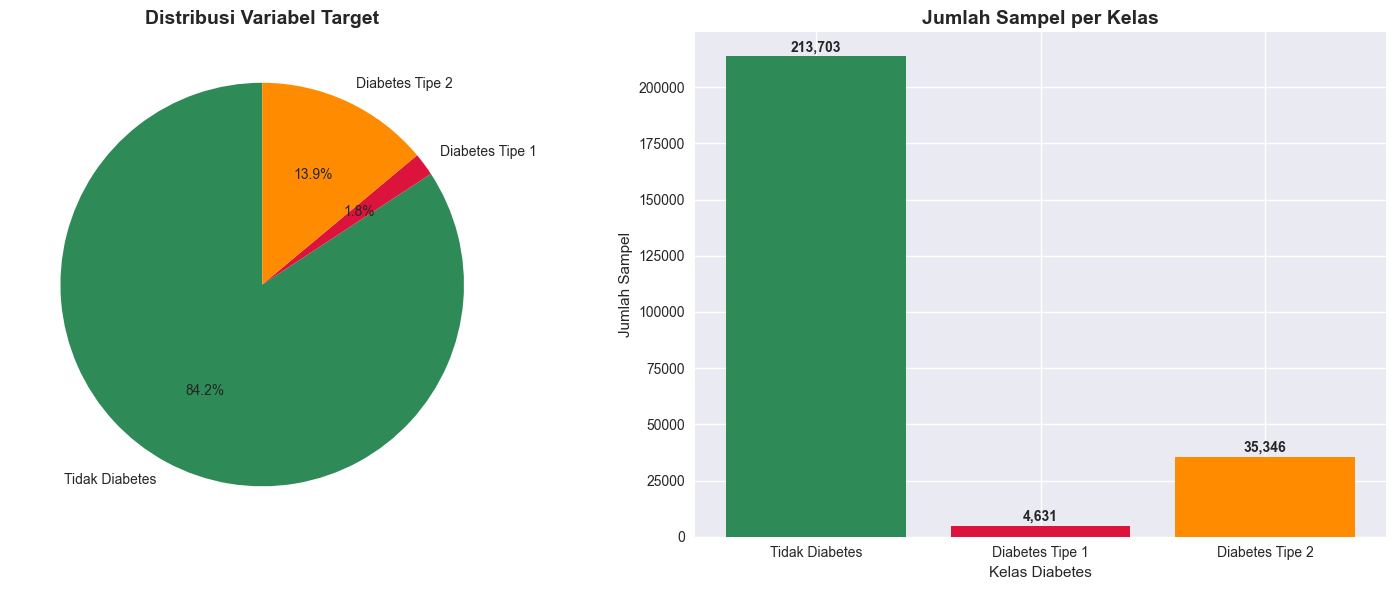

In [17]:
# Target variable distribution
target_column = 'Diabetes_012'
print(f"Variabel target: {target_column}")

target_counts = df[target_column].value_counts().sort_index()
target_percentages = df[target_column].value_counts(normalize=True).sort_index() * 100

# Create target analysis dataframe
target_analysis = pd.DataFrame({
    'Kelas': ['Tidak Diabetes', 'Diabetes Tipe 1', 'Diabetes Tipe 2'],
    'Jumlah': target_counts.values,
    'Persentase': target_percentages.values
})

print("Distribusi:")
display(target_analysis)

# Visualization of target distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
colors = ['#2E8B57', '#DC143C', '#FF8C00']
ax1.pie(target_counts.values, labels=target_analysis['Kelas'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Distribusi Variabel Target', fontsize=14, fontweight='bold')

# Bar chart
bars = ax2.bar(target_analysis['Kelas'], target_analysis['Jumlah'], color=colors)
ax2.set_title('Jumlah Sampel per Kelas', fontsize=14, fontweight='bold')
ax2.set_ylabel('Jumlah Sampel')
ax2.set_xlabel('Kelas Diabetes')

# Add value labels on bars
for bar, count in zip(bars, target_analysis['Jumlah']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 4. Data Preprocessing & Model Training


In [18]:
# Prepare data
feature_columns = [col for col in df.columns if col != target_column]
X = df[feature_columns]
y = df[target_column]

print(f"Ukuran data:")
print(f"   • Fitur (X): {X.shape}")
print(f"   • Target (y): {y.shape}")

# Feature scaling
print(f"\nMenerapkan StandardScaler...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_columns)

print(f"Fitur berhasil dinormalisasi!")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nHasil Pembagian Data:")
print(f"   • Data latih: {X_train.shape[0]:,} sampel")
print(f"   • Data uji: {X_test.shape[0]:,} sampel")

# Train Random Forest
print(f"\nMelatih Random Forest Classifier...")
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1
)

rf_classifier.fit(X_train, y_train)
print("Pelatihan model selesai!")

# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)

print(f"\nPrediksi selesai!")
print(f"   • Ukuran prediksi: {y_pred.shape}")
print(f"   • Ukuran probabilitas: {y_pred_proba.shape}")


Ukuran data:
   • Fitur (X): (253680, 21)
   • Target (y): (253680,)

Menerapkan StandardScaler...
Fitur berhasil dinormalisasi!

Hasil Pembagian Data:
   • Data latih: 202,944 sampel
   • Data uji: 50,736 sampel

Melatih Random Forest Classifier...
Pelatihan model selesai!

Prediksi selesai!
   • Ukuran prediksi: (50736,)
   • Ukuran probabilitas: (50736, 3)


## 5. Model Evaluation & Visualization


Metrik Performa:
   • Akurasi: 0.8478 (84.78%)
   • Presisi (terbobot): 0.8021
   • Recall (terbobot): 0.8478
   • F1-Score (terbobot): 0.7970

Laporan Klasifikasi Detail:
                 precision    recall  f1-score   support

 Tidak Diabetes       0.85      0.99      0.92     42741
Diabetes Tipe 1       0.00      0.00      0.00       926
Diabetes Tipe 2       0.59      0.10      0.18      7069

       accuracy                           0.85     50736
      macro avg       0.48      0.36      0.36     50736
   weighted avg       0.80      0.85      0.80     50736


Matriks Konfusi:
[[42279     0   462]
 [  880     0    46]
 [ 6332     0   737]]


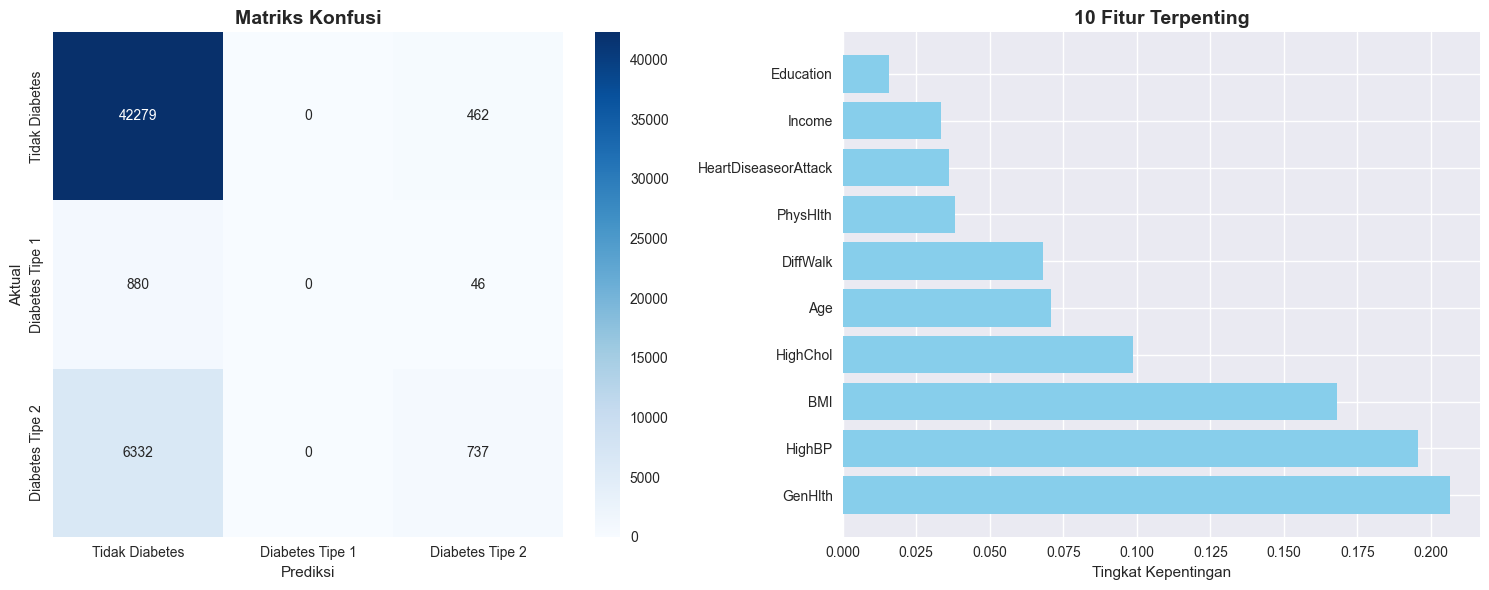


Tingkat Kepentingan Fitur (10 Teratas):


,feature,importance
13,GenHlth,0.206394
0,HighBP,0.195495
3,BMI,0.168124
1,HighChol,0.098647
18,Age,0.070663
16,DiffWalk,0.068012
15,PhysHlth,0.038248
6,HeartDiseaseorAttack,0.036281
20,Income,0.033376
19,Education,0.015600


In [19]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Metrik Performa:")
print(f"   • Akurasi: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   • Presisi (terbobot): {precision:.4f}")
print(f"   • Recall (terbobot): {recall:.4f}")
print(f"   • F1-Score (terbobot): {f1:.4f}")

# Detailed classification report
print(f"\nLaporan Klasifikasi Detail:")
print(classification_report(y_test, y_pred, 
                          target_names=['Tidak Diabetes', 'Diabetes Tipe 1', 'Diabetes Tipe 2']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nMatriks Konfusi:")
print(cm)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Tidak Diabetes', 'Diabetes Tipe 1', 'Diabetes Tipe 2'],
            yticklabels=['Tidak Diabetes', 'Diabetes Tipe 1', 'Diabetes Tipe 2'])
ax1.set_title('Matriks Konfusi', fontsize=14, fontweight='bold')
ax1.set_xlabel('Prediksi')
ax1.set_ylabel('Aktual')

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

# Top 10 features
top_features = feature_importance.head(10)
ax2.barh(top_features['feature'], top_features['importance'], color='skyblue')
ax2.set_title('10 Fitur Terpenting', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tingkat Kepentingan')

plt.tight_layout()
plt.show()

# Display feature importance table
print(f"\nTingkat Kepentingan Fitur (10 Teratas):")
display(feature_importance.head(10))


## 6. Model Inference Example


In [20]:
# Example prediction
print("Contoh: Memprediksi diabetes untuk pasien baru...")

# Sample patient data
sample_patient = {
    'HighBP': 1.0,           # Tekanan darah tinggi: Ya
    'HighChol': 0.0,         # Kolesterol tinggi: Tidak
    'CholCheck': 1.0,        # Pengecekan kolesterol: Ya
    'BMI': 28.5,             # BMI: 28.5 (kelebihan berat badan)
    'Smoker': 0.0,           # Perokok: Tidak
    'Stroke': 0.0,           # Riwayat stroke: Tidak
    'HeartDiseaseorAttack': 0.0,  # Penyakit jantung: Tidak
    'PhysActivity': 1.0,     # Aktivitas fisik: Ya
    'Fruits': 1.0,           # Konsumsi buah: Ya
    'Veggies': 1.0,          # Konsumsi sayuran: Ya
    'HvyAlcoholConsump': 0.0, # Konsumsi alkohol berat: Tidak
    'AnyHealthcare': 1.0,    # Akses layanan kesehatan: Ya
    'NoDocbcCost': 0.0,      # Tidak ke dokter karena biaya: Tidak
    'GenHlth': 3.0,          # Kesehatan umum: 3 (cukup)
    'MentHlth': 5.0,         # Hari kesehatan mental buruk: 5
    'PhysHlth': 5.0,         # Hari kesehatan fisik buruk: 5
    'DiffWalk': 0.0,         # Kesulitan berjalan: Tidak
    'Sex': 0.0,              # Jenis kelamin: Perempuan
    'Age': 9.0,              # Kategori usia: 9 (45-49)
    'Education': 4.0,        # Pendidikan: 4 (kuliah sebagian)
    'Income': 3.0            # Pendapatan: 3 ($15k-$20k)
}

print(f"Data pasien contoh:")
for key, value in sample_patient.items():
    print(f"   • {key}: {value}")

# Create DataFrame for prediction
patient_df = pd.DataFrame([sample_patient])
patient_scaled = scaler.transform(patient_df)
patient_scaled_df = pd.DataFrame(patient_scaled, columns=feature_columns)

# Make prediction
prediction = rf_classifier.predict(patient_scaled_df)[0]
prediction_proba = rf_classifier.predict_proba(patient_scaled_df)[0]

print(f"\nHasil Prediksi:")
print(f"   • Kelas yang diprediksi: {prediction}")
print(f"   • Nama kelas: {['Tidak Diabetes', 'Diabetes Tipe 1', 'Diabetes Tipe 2'][int(prediction)]}")

print(f"\nProbabilitas Prediksi:")
for i, prob in enumerate(prediction_proba):
    class_name = ['Tidak Diabetes', 'Diabetes Tipe 1', 'Diabetes Tipe 2'][i]
    print(f"   • {class_name}: {prob:.4f} ({prob*100:.2f}%)")


Contoh: Memprediksi diabetes untuk pasien baru...
Data pasien contoh:
   • HighBP: 1.0
   • HighChol: 0.0
   • CholCheck: 1.0
   • BMI: 28.5
   • Smoker: 0.0
   • Stroke: 0.0
   • HeartDiseaseorAttack: 0.0
   • PhysActivity: 1.0
   • Fruits: 1.0
   • Veggies: 1.0
   • HvyAlcoholConsump: 0.0
   • AnyHealthcare: 1.0
   • NoDocbcCost: 0.0
   • GenHlth: 3.0
   • MentHlth: 5.0
   • PhysHlth: 5.0
   • DiffWalk: 0.0
   • Sex: 0.0
   • Age: 9.0
   • Education: 4.0
   • Income: 3.0

Hasil Prediksi:
   • Kelas yang diprediksi: 0.0
   • Nama kelas: Tidak Diabetes

Probabilitas Prediksi:
   • Tidak Diabetes: 0.7595 (75.95%)
   • Diabetes Tipe 1: 0.0287 (2.87%)
   • Diabetes Tipe 2: 0.2118 (21.18%)


## 7. Save Model & Summary


In [ ]:
# Save model and scaler
import joblib

print("💾 Menyimpan model dan scaler...")

# Save the trained model
model_filename = 'diabetes_rf_model.joblib'
joblib.dump(rf_classifier, model_filename)
print(f" Model disimpan sebagai: {model_filename}")

# Save the scaler
scaler_filename = 'diabetes_scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Scaler disimpan sebagai: {scaler_filename}")

print(f"\n🎉 Pelatihan dan evaluasi model berhasil diselesaikan!")
print(f" File yang dibuat:")
print(f"   • {model_filename}")
print(f"   • {scaler_filename}")

# Summary
print(f"\n Ringkasan Performa Model:")
print(f"   • Dataset: {df.shape[0]:,} sampel, {df.shape[1]} fitur")
print(f"   • Model: Random Forest Classifier")
print(f"   • Akurasi: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   • F1-Score: {f1:.4f}")
print(f"   • Kelas: 3 (Tidak Diabetes, Diabetes Tipe 1, Diabetes Tipe 2)")

print(f"\n 5 Fitur Terpenting:")
for i, (_, row) in enumerate(feature_importance.head(5).iterrows()):
    print(f"   {i+1}. {row['feature']}: {row['importance']:.4f}")

print(f"\n Model siap untuk deployment!")


💾 Menyimpan model dan scaler...
✅ Model disimpan sebagai: diabetes_rf_model.joblib
✅ Scaler disimpan sebagai: diabetes_scaler.joblib

🎉 Pelatihan dan evaluasi model berhasil diselesaikan!
📁 File yang dibuat:
   • diabetes_rf_model.joblib
   • diabetes_scaler.joblib

📋 Ringkasan Performa Model:
   • Dataset: 253,680 sampel, 22 fitur
   • Model: Random Forest Classifier
   • Akurasi: 0.8478 (84.78%)
   • F1-Score: 0.7970
   • Kelas: 3 (Tidak Diabetes, Diabetes Tipe 1, Diabetes Tipe 2)

🔍 5 Fitur Terpenting:
   1. GenHlth: 0.2064
   2. HighBP: 0.1955
   3. BMI: 0.1681
   4. HighChol: 0.0986
   5. Age: 0.0707

✅ Model siap untuk deployment!
